<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/Lecture_2_2_15_Overfitting%2C_underfitting_Regularization_Polinomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Поліноміальна регресія

Згенеруємо дані.

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(2 - 3 * np.random.normal(0, 1, 40))
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 40)

# додамо ще одну вісь для передачі в лін регресію
X = x[:, np.newaxis]
y = y[:, np.newaxis]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=False)

Будуємо першу модель - звичайну лінійну регресію.

In [2]:
np.mean(x), np.std(x)

(np.float64(1.062372580351478), np.float64(3.193001569315324))

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print('Train RMSE: ', root_mean_squared_error(y_train, y_pred_train))
print('Test RMSE: ', root_mean_squared_error(y_val, y_pred_val))

Train RMSE:  16.546391713423994
Test RMSE:  53.43390310680755


Величезна помилка на тестувальних даних: спостерігаємо недонавчання.

In [6]:
linspace = np.linspace(min(X), max(X), 40)
y_pred_model = model.predict(linspace)

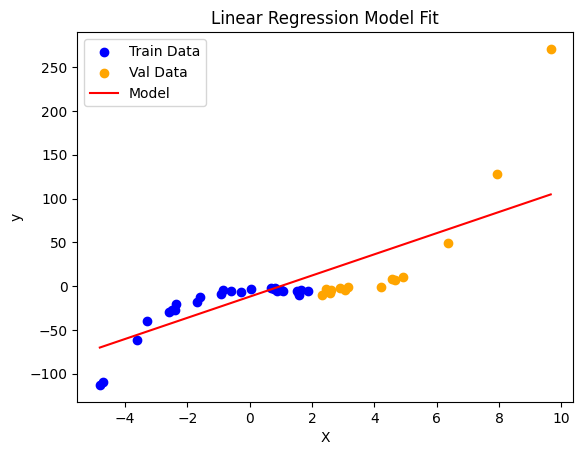

In [7]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_val, y_val, color='orange', label='Val Data')
plt.plot(linspace, y_pred_model, color='red', label='Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model Fit')
plt.legend()
plt.show()

In [10]:
def gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_iterations):
    m = len(y_train)
    theta = np.random.randn(X_train.shape[1], 1)
    learning_curve_train = []
    learning_curve_val = []
    for iteration in range(n_iterations):
        gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
        theta = theta - learning_rate * gradients
        y_pred = X_train.dot(theta)
        y_pred_val = X_val.dot(theta)
        train_error = root_mean_squared_error(y_train, y_pred)
        val_error = root_mean_squared_error(y_val, y_pred_val)
        learning_curve_train.append(train_error)
        learning_curve_val.append(val_error)
    print('Train RMSE: ', train_error)
    print('Test RMSE: ', val_error)
    return theta, learning_curve_train, learning_curve_val


def plot_learning_curve(n_iterations, learning_curve_train, learning_curve_val):
  plt.plot(range(n_iterations), learning_curve_train, 'r-', label='Training error')
  plt.plot(range(n_iterations), learning_curve_val, 'g-', label='Validation error')
  plt.xlabel('Number of Epochs')
  plt.ylabel('Mean Squared Error')
  plt.title('Learning Curve (Gradient Descent)')
  plt.legend(loc='best')
  plt.grid()
  plt.show()


def plot_model(theta, X_train, y_train, X_val, y_val):
    plt.scatter(X_train[:, 1], y_train, color='blue', label='Train Data')
    plt.scatter(X_val[:, 1], y_val, color='orange', label='Val Data')

    # Combining X_train and X_val for plotting
    X_combined = np.concatenate((X_train, X_val), axis=0)
    X_combined_sorted_indices = np.argsort(X_combined[:, 1])
    X_combined_sorted = X_combined[X_combined_sorted_indices]

    # Making predictions with the sorted combined data
    y_pred_sorted = X_combined_sorted.dot(theta)

    plt.plot(X_combined_sorted[:, 1], y_pred_sorted, color='red', label='Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Model Fit')
    plt.legend()
    plt.show()

Train RMSE:  16.60237872613436
Test RMSE:  53.502205529778536


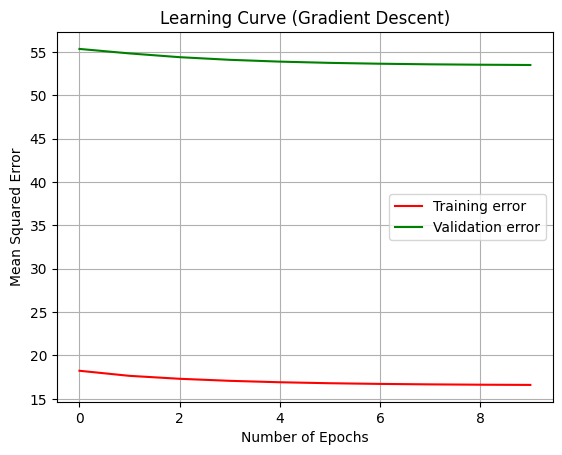

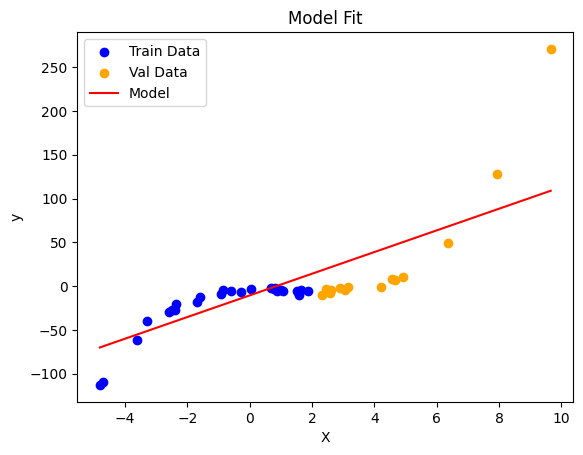

In [11]:
# Adding the intercept term to X
X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

# Parameters
learning_rate = 0.1
n_iterations = 10

# Train model and plot learning curve
theta, learning_curve_train, learning_curve_val = gradient_descent(X_b_train, y_train, X_b_val, y_val, learning_rate, n_iterations)
plot_learning_curve(n_iterations, learning_curve_train, learning_curve_val)
plot_model(theta, X_b_train, y_train, X_b_val, y_val)

## Додаємо поліноміальні ознаки

In [12]:
import operator
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures клас дозволяє генерувати всі поліноміальні комбінації ознак до зазначеної степені включно. Наприклад, якщо у нас є ознаки а та b, то будуть згенеровані додаткові ознаки [1, a, b, a^2, ab, b^2]. Ці ознаки можна додавати як в лінійну, так і в логістичну регресії, а також в інші моделі. Фактично - це спосіб Feature engineering.

In [13]:
def fit_poly_reg(X_train, y_train, X_val, y_val, degree, learning_rate, n_iterations):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_val_poly = polynomial_features.fit_transform(X_val)

    # Train model and plot learning curve
    theta, learning_curve_train, learning_curve_val = gradient_descent(X_train_poly, y_train, X_val_poly, y_val, learning_rate, n_iterations)
    plot_learning_curve(n_iterations, learning_curve_train, learning_curve_val)

    return X_train_poly, X_val_poly, theta

Train RMSE:  4.19539070410604
Test RMSE:  220.53545341393328


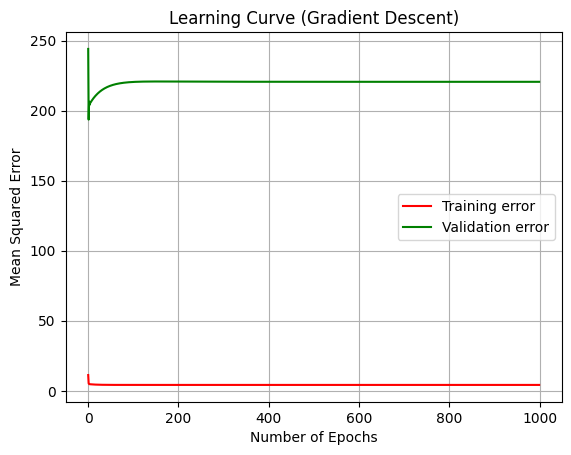

In [14]:
X_train_poly, X_val_poly, theta = fit_poly_reg(X_train, y_train, X_val, y_val, degree=2, learning_rate=0.01, n_iterations=1000)

У нас вийшло 3 ознаки: 1, х и х^2.

Знову ж таки, величезна помилка на тестових даних. Але чому? Давайте намалюємо модель.

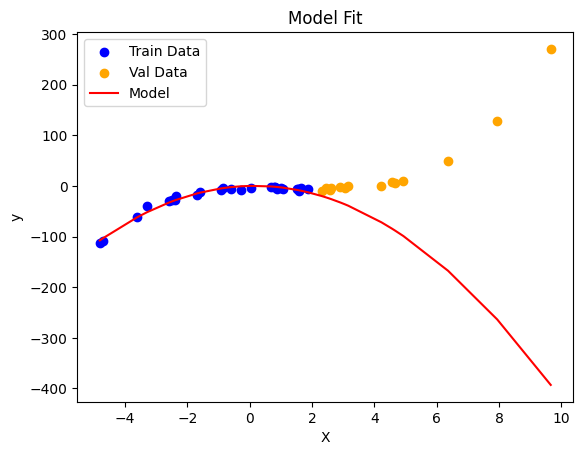

In [15]:
plot_model(theta, X_train_poly, y_train, X_val_poly, y_val)

У нас модель - це парабола, яка зафітилась дуже добре під тренувальні дані і погано апроксимує тестувальні. Це - перенавчання. По графіку кривих бачимо, що тренувальний лосс малий, а валідаційний - дуже великий.

Здається, що треба просто зафітити модел третього степеня. Давайте спробуємо!


Train RMSE:  47.124311401760565
Test RMSE:  71.9683168053488


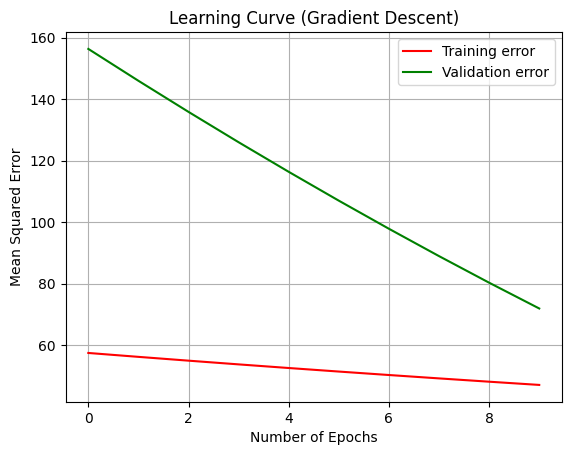

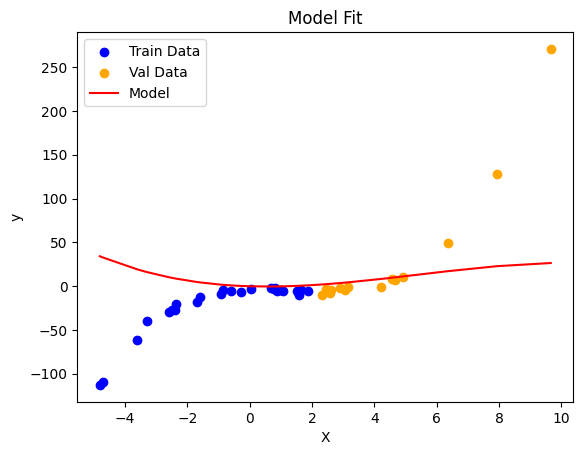

In [16]:
X_train_poly, X_val_poly, theta = fit_poly_reg(X_train, y_train, X_val, y_val, degree=3, learning_rate=0.00001, n_iterations=10)
plot_model(theta, X_train_poly, y_train, X_val_poly, y_val)

Модель погана, тому що вона фітиться на тренувальних даних, а в них немає натяку на ще один вигин! І тому поліном регресія - це так собі модель для продакшена.

Train RMSE:  33.44808413156076
Test RMSE:  33.44808413156076


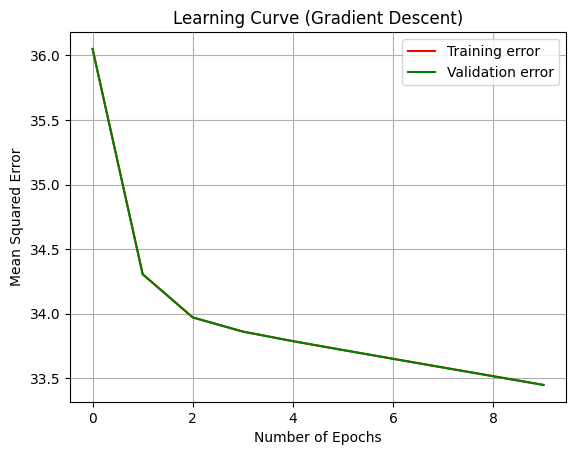

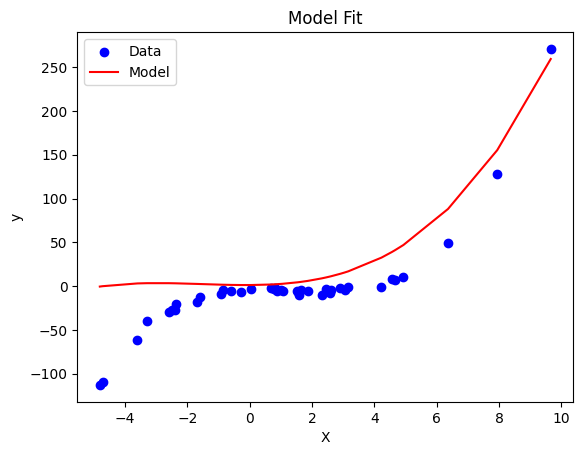

In [17]:
polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)

n_iterations = 10

theta, learning_curve_train, learning_curve_val = gradient_descent(X_poly, y, X_poly, y, learning_rate=0.00001, n_iterations=n_iterations)
plot_learning_curve(n_iterations, learning_curve_train, learning_curve_val)

plt.scatter(sorted(X), y, color='blue', label='Data')
plt.plot(sorted(X), X_poly.dot(theta), color='red', label='Model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Fit')
plt.legend()
plt.show()

У нас виходить доволі непогана модель! АЛЕ! Ми в тренування використали ВСІ дані. Де гарантія, що далі дані не підуть вниз? А модель у нас вже має конкретно форму функції третього степеня.

Ще один приклад використання поліноміальної регресії і перетренування можемо розглянути в статті: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

## Поліноміальна регресія на подібних до реальних даних

Для демо скористаюсь набором даних California Housing.

In [18]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

In [19]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
target_col_name = dataset['target_names'][0]
df[target_col_name] = dataset['target']
del dataset

In [20]:
df.shape

(20640, 9)

In [21]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### З одною ознакою

In [22]:
X = pd.DataFrame(df['MedInc'])
y = df[target_col_name]

In [23]:
# Розбивка на тренувальні та вал. дані
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
def train_lin_vs_poly_reg_and_plot(X_train, X_val, y_train, y_val, degree):
  # Звичайна лінійна регресія
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred_train_lin = lin_reg.predict(X_train)
  y_pred_val_lin = lin_reg.predict(X_val)

  # Поліноміальна регресія
  poly_features = PolynomialFeatures(degree=degree)
  X_train_poly = poly_features.fit_transform(X_train)
  X_val_poly = poly_features.transform(X_val)

  print(f'В оригіналній матриці Х {X.shape[1]} ознак.')
  print(f'В матриці Х з поліноміальними ознаками {X_train_poly.shape[1]} ознак.\n')

  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  y_pred_train_poly = poly_reg.predict(X_train_poly)
  y_pred_val_poly = poly_reg.predict(X_val_poly)

  # Оцінка моделей

  rmse_lin_train = root_mean_squared_error(y_train, y_pred_train_lin)
  rmse_poly_train = root_mean_squared_error(y_train, y_pred_train_poly)

  rmse_lin_val = root_mean_squared_error(y_val, y_pred_val_lin)
  rmse_poly_val = root_mean_squared_error(y_val, y_pred_val_poly)


  print(f"Train RMSE for Linear Regression: {np.sqrt(rmse_lin_train):.3f}")
  print(f"Test RMSE for Linear Regression: {np.sqrt(rmse_lin_val):.3f}\n")

  print(f"Train RMSE for Polynomial Regression (degree {degree}): {np.sqrt(rmse_poly_train):.3f}")
  print(f"Test RMSE for Polynomial Regression (degree {degree}): {np.sqrt(rmse_poly_val):.3f}")

In [27]:
degree = 2
train_lin_vs_poly_reg_and_plot(X_train, X_val, y_train, y_val, degree)

В оригіналній матриці Х 1 ознак.
В матриці Х з поліноміальними ознаками 3 ознак.

Train RMSE for Linear Regression: 0.914
Test RMSE for Linear Regression: 0.918

Train RMSE for Polynomial Regression (degree 2): 0.912
Test RMSE for Polynomial Regression (degree 2): 0.916


In [28]:
degree = 5
train_lin_vs_poly_reg_and_plot(X_train, X_val, y_train, y_val, degree)

В оригіналній матриці Х 1 ознак.
В матриці Х з поліноміальними ознаками 6 ознак.

Train RMSE for Linear Regression: 0.914
Test RMSE for Linear Regression: 0.918

Train RMSE for Polynomial Regression (degree 5): 0.908
Test RMSE for Polynomial Regression (degree 5): 0.914


### З кількома ознаками

In [29]:
X = df.drop([target_col_name],axis=1)
y = df[[target_col_name]]

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
degree = 2
train_lin_vs_poly_reg_and_plot(X_train, X_val, y_train, y_val, degree)

В оригіналній матриці Х 8 ознак.
В матриці Х з поліноміальними ознаками 45 ознак.

Train RMSE for Linear Regression: 0.848
Test RMSE for Linear Regression: 0.863

Train RMSE for Polynomial Regression (degree 2): 0.805
Test RMSE for Polynomial Regression (degree 2): 0.825


In [32]:
degree = 5
train_lin_vs_poly_reg_and_plot(X_train, X_val, y_train, y_val, degree)

В оригіналній матриці Х 8 ознак.
В матриці Х з поліноміальними ознаками 1287 ознак.

Train RMSE for Linear Regression: 0.848
Test RMSE for Linear Regression: 0.863

Train RMSE for Polynomial Regression (degree 5): 0.952
Test RMSE for Polynomial Regression (degree 5): 2.093


# L1 та L2 регуляризація

In [33]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
models = [
    LinearRegression(),
    Ridge(),
    Ridge(alpha=2),
    Lasso(),
    ElasticNet(),
    ElasticNet(alpha=0.5)
]

In [34]:
#?ElasticNet

In [35]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [44]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_metrics = round(root_mean_squared_error(y_train, y_train_pred),6)
    val_metrics = round(root_mean_squared_error(y_val, y_val_pred), 6)

    return dict(train=train_metrics, val=val_metrics)

In [45]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

In [46]:
X_train_poly.shape

(16512, 45)

In [ ]:
# for model in models:
#     model.fit(X_train_poly, y_train)
#     eval_results  = evaluate_model(model, X_train_poly, y_train, X_val_poly, y_val)
#     print(f'{str(model)}: {eval_results}\n')

In [ ]:
#?Ridge

In [48]:
import warnings

warnings.filterwarnings("ignore")

for model in models:
    model.fit(X_train_poly, y_train)
    eval_results  = evaluate_model(model, X_train_poly, y_train, X_val_poly, y_val)
    print(f'{str(model)}: {eval_results}\n')

LinearRegression(): {'train': 0.648634, 'val': 0.681397}

Ridge(): {'train': 0.652203, 'val': 0.665038}

Ridge(alpha=2): {'train': 0.653629, 'val': 0.668249}

Lasso(): {'train': 0.706103, 'val': 0.714775}

ElasticNet(): {'train': 0.700237, 'val': 0.714165}

ElasticNet(alpha=0.5): {'train': 0.690746, 'val': 0.702065}



Ridge регресія спрацювала найкраще.

In [49]:
model = Ridge()
model.fit(X_train_poly, y_train)

coefs_df = pd.DataFrame(poly_features.get_feature_names_out(X_train.columns), columns=['feature_name'])
coefs_df['value'] = model.coef_.round(5).flatten()

In [50]:
coefs_df.set_index('feature_name').sort_values(by='value', ascending=False).style.background_gradient()

,value
feature_name,
Latitude,3.314450
AveRooms,0.968470
AveOccup,0.953770
AveBedrms^2,0.177640
Longitude,0.097850
Latitude Longitude,0.050310
AveRooms Latitude,0.038590
Latitude^2,0.037650
MedInc AveRooms,0.033150
